In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Training Data.csv')
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
train.info() # have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
train.drop(columns={'Id'}, inplace=True) # drop useless column

In [5]:
train.isnull().sum() # no nan values

income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [6]:
train.married.value_counts() #imbalanced married column

single     226272
married     25728
Name: married, dtype: int64

<AxesSubplot:xlabel='married', ylabel='count'>

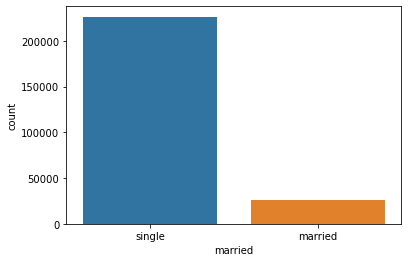

In [7]:
sns.countplot(x='married', data=train)

<AxesSubplot:xlabel='married', ylabel='count'>

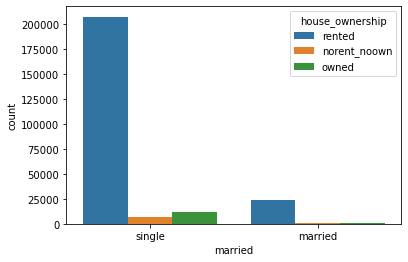

In [8]:
sns.countplot(x='married', hue='house_ownership', data=train) # in dataset there is majority of who is single and rent house

In [9]:
train.house_ownership.value_counts() #three types of house ownershipping

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

([<matplotlib.patches.Wedge at 0x240c2b29b50>,
 [Text(-1.0656389922568725, 0.27278844950209524, 'rented'),
  Text(1.0369696920508071, -0.36700661815293545, 'owned'),
  Text(1.09559136493431, -0.09838476041224982, 'norent_noown')])

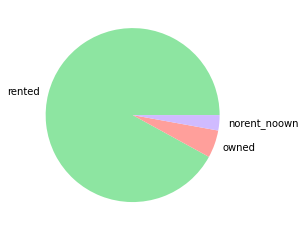

In [10]:
labels = ['rented', 'owned', 'norent_noown']
data=[231898, 12918, 7184]

plt.pie(data, labels=labels, colors = sns.color_palette('pastel')[2:5])

In [11]:
train.car_ownership.value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

<AxesSubplot:xlabel='car_ownership', ylabel='count'>

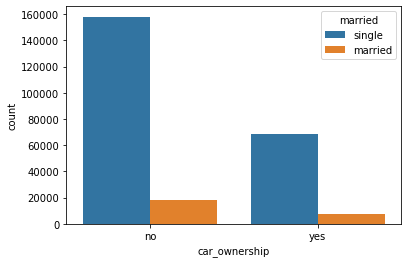

In [12]:
sns.countplot(x='car_ownership', hue='married', data=train)

In [13]:
married = len(train[(train.married == 'married')]) # percentage of who have car among married
len(train[(train.married == 'married') & (train.car_ownership == 'yes')]) / married * 100 

29.994558457711445

In [14]:
single = len(train.car_ownership[(train.married == 'single')]) # percentage of who have car among single
len(train[(train.married == 'single') & (train.car_ownership == 'yes')]) / single * 100

#their percentage are same

30.177397114976667

In [15]:
train.loc[train.married == 'married', 'married'] = 1 # label encoding
train.loc[train.married == 'single', 'married'] = 0

In [16]:
train.loc[train.house_ownership == 'norent_noown', 'house_ownership'] = 0 # label encoding
train.loc[train.house_ownership == 'rented', 'house_ownership'] = 1
train.loc[train.house_ownership == 'owned', 'house_ownership'] = 2

In [17]:
train.loc[train.car_ownership == 'yes', 'car_ownership'] = 1 # label encoding
train.loc[train.car_ownership == 'no', 'car_ownership'] = 0

In [18]:
train.married = train.married.astype(int) #just change type
train.house_ownership = train.house_ownership.astype(int)
train.car_ownership = train.car_ownership.astype(int)

In [19]:
train

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,0,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,1,1,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,0,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,1,0,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,0,1,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,0,1,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,0,1,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [20]:
train.corr()['risk_flag']

income                -0.003091
age                   -0.021809
experience            -0.034523
married               -0.021092
house_ownership       -0.011171
car_ownership         -0.024036
current_job_years     -0.016942
current_house_years   -0.004375
risk_flag              1.000000
Name: risk_flag, dtype: float64

In [21]:
train.profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [22]:
train.profession.nunique() # we have 51 unique professions

51

In [23]:
train.city.unique() # some city names is incorrect

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [24]:
train.loc[train.city.str.contains(']'), 'city'] = train.city[train.city.str.contains(']')].str.split('[').str[0] 
# normalize city names

In [25]:
train.city.value_counts()

Aurangabad       1543
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa          1180
                 ... 
Ujjain            486
Warangal          459
Bettiah           457
Katni             448
Karaikudi         431
Name: city, Length: 316, dtype: int64

In [26]:
train.state.value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

In [27]:
train['state_city'] = train.state + '_' + train.city # make new column

In [28]:
train.state_city.value_counts() # now we merged 2 column into 1

Andhra_Pradesh_Vijayanagaram    1259
Madhya_Pradesh_Bhopal           1208
Uttar_Pradesh_Bulandshahr       1185
Bihar_Saharsa                   1180
Andhra_Pradesh_Vijayawada       1172
                                ... 
Madhya_Pradesh_Ujjain            486
Telangana_Warangal               459
Bihar_Bettiah                    457
Madhya_Pradesh_Katni             448
Tamil_Nadu_Karaikudi             431
Name: state_city, Length: 317, dtype: int64

In [29]:
train

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,state_city
0,1303835,23,3,0,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Madhya_Pradesh_Rewa
1,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0,Maharashtra_Parbhani
2,3991815,66,4,1,1,0,Technical_writer,Alappuzha,Kerala,4,10,0,Kerala_Alappuzha
3,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,Odisha_Bhubaneswar
4,5768871,47,11,0,1,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1,Tamil_Nadu_Tiruchirappalli
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,1,0,Surgeon,Kolkata,West_Bengal,6,11,0,West_Bengal_Kolkata
251996,2843572,26,10,0,1,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Madhya_Pradesh_Rewa
251997,4522448,46,7,0,1,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,Maharashtra_Kalyan-Dombivli
251998,6507128,45,0,0,1,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,Puducherry_Pondicherry


In [30]:
train.drop(columns={'city', 'state', 'profession', 'state_city'}, inplace=True) 
# in the end we decided that we don't need this columns

In [31]:
train

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
0,1303835,23,3,0,1,0,3,13,0
1,7574516,40,10,0,1,0,9,13,0
2,3991815,66,4,1,1,0,4,10,0
3,6256451,41,2,0,1,1,2,12,1
4,5768871,47,11,0,1,0,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,1,0,6,11,0
251996,2843572,26,10,0,1,0,6,11,0
251997,4522448,46,7,0,1,0,7,12,0
251998,6507128,45,0,0,1,0,0,10,0


In [76]:
train[['income', 'age', 'experience', 'current_job_years', 'current_house_years']].describe().T.round(2)
# check for normal distribution of not hand made columns

,count,mean,std,min,25%,50%,75%,max
income,252000.0,0.50,0.29,0.0,0.25,0.50,0.75,1.0
age,252000.0,0.50,0.29,0.0,0.24,0.50,0.76,1.0
experience,252000.0,0.50,0.30,0.0,0.25,0.50,0.75,1.0
current_job_years,252000.0,0.45,0.26,0.0,0.21,0.43,0.64,1.0
current_house_years,252000.0,0.50,0.35,0.0,0.25,0.50,0.75,1.0


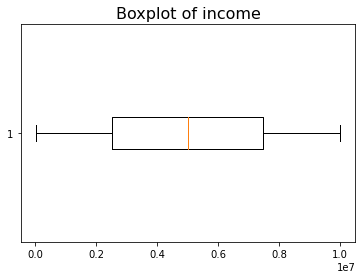

In [33]:
plt.boxplot(train.income, vert=False)
plt.title('Boxplot of income', size=16);

In [34]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # make min max scaling, from 0 to 1
train[['income', 'age', 'experience', 'current_job_years', 'current_house_years']] = mm.fit_transform(train[['income', 'age', 'experience', 'current_job_years', 'current_house_years']].values)

In [35]:
train

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
0,0.129487,0.034483,0.15,0,1,0,0.214286,0.75,0
1,0.757206,0.327586,0.50,0,1,0,0.642857,0.75,0
2,0.398564,0.775862,0.20,1,1,0,0.285714,0.00,0
3,0.625263,0.344828,0.10,0,1,1,0.142857,0.50,1
4,0.576454,0.448276,0.55,0,1,0,0.214286,1.00,1
...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,0,1,0,0.428571,0.25,0
251996,0.283620,0.086207,0.50,0,1,0,0.428571,0.25,0
251997,0.451682,0.431034,0.35,0,1,0,0.500000,0.50,0
251998,0.650356,0.413793,0.00,0,1,0,0.000000,0.00,0


In [36]:
train.corr()['risk_flag'].sort_values(ascending=False)
# we have negative correlation, which means we should not expect too much

risk_flag              1.000000
income                -0.003091
current_house_years   -0.004375
house_ownership       -0.011171
current_job_years     -0.016942
married               -0.021092
age                   -0.021809
car_ownership         -0.024036
experience            -0.034523
Name: risk_flag, dtype: float64

In [37]:
from imblearn.pipeline import make_pipeline   
from imblearn.over_sampling import ADASYN, SMOTE # libraries to use resampling functions to handle imbalancing

In [38]:
X = train.drop(columns={'risk_flag'}) #identify X and y
y = train.risk_flag

In [39]:
from sklearn.linear_model import LogisticRegression as log # import models and scoring libraries
from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split, cross_validate

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100) 

In [42]:
y_train.value_counts(), y_test.value_counts() # firstly just fitting

(0    165781
 1     23219
 Name: risk_flag, dtype: int64,
 0    55223
 1     7777
 Name: risk_flag, dtype: int64)

In [43]:
tree = tree()
log = log()
knn = knn()

In [44]:
tree.fit(X_train, y_train)
log.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred_tree = tree.predict(X_test)
y_pred_log = log.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [46]:
preds = [y_pred_tree, y_pred_log, y_pred_knn]

In [47]:
models = ['Decision Tree', 'Logistic', 'KNN']
for i, j in zip(preds, models):
    print('----------------------', j, '---------------------------')
    print(classification_report(y_test, i))

---------------------- Decision Tree ---------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     55223
           1       0.53      0.56      0.55      7777

    accuracy                           0.88     63000
   macro avg       0.73      0.75      0.74     63000
weighted avg       0.89      0.88      0.89     63000

---------------------- Logistic ---------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     55223
           1       0.00      0.00      0.00      7777

    accuracy                           0.88     63000
   macro avg       0.44      0.50      0.47     63000
weighted avg       0.77      0.88      0.82     63000

---------------------- KNN ---------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     55223
           1       0.56      0.50      0.53      7777

  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


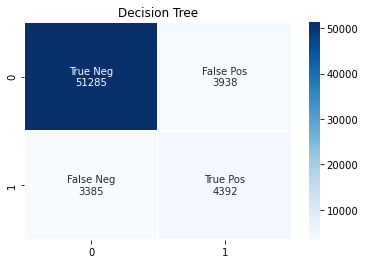

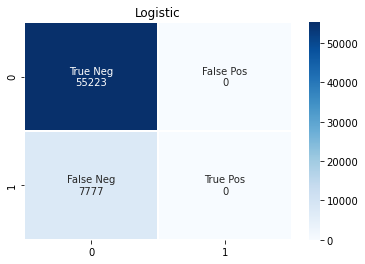

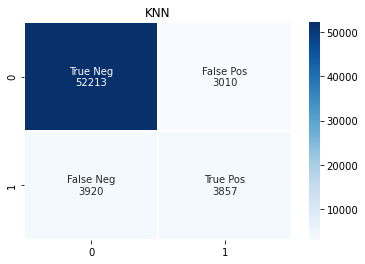

In [48]:
for i, j in zip(preds, models):
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    cnt = ['{0:0.0f}'.format(i) for i in
                confusion_matrix(y_test, i).flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(names, cnt)]

    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, i), annot=labels, fmt='', linewidths=.3, cmap="Blues").set(title=j)

In [49]:
y_prob_tree = tree.predict_proba(X_test)
y_prob_log = log.predict_proba(X_test)
y_prob_knn = knn.predict_proba(X_test)
y_probs = [y_prob_tree[:, 1], y_prob_log[:, 1], y_prob_knn[:, 1]]

Best Threshold=0.045455, G-Mean=0.856


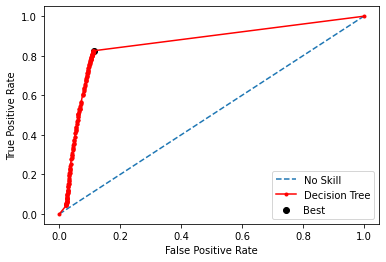

Best Threshold=0.123258, G-Mean=0.535


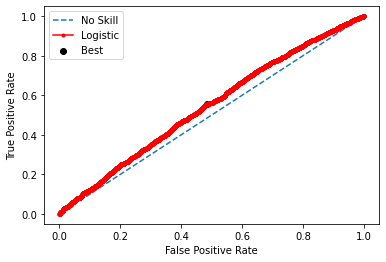

Best Threshold=0.200000, G-Mean=0.858


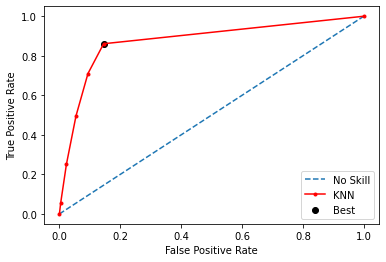

In [50]:
for i, j in zip(y_probs, models):
    fpr, tpr, thresholds = roc_curve(y_test, i)
    gmeans = np.sqrt(tpr.flatten() * (1 - fpr.flatten()))

    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=j, color='red')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [51]:
tree_pred = (y_probs[0] > 0.04).astype(bool)
log_pred = (y_probs[1] > 0.12).astype(bool)
knn_pred = (y_probs[2] > 0.2).astype(bool)
probs = [tree_pred, log_pred, knn_pred]

In [52]:
for i, j in zip(probs, models):
    print('----------------------', j, '---------------------------')
    print(classification_report(y_test, i))

---------------------- Decision Tree ---------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     55223
           1       0.51      0.83      0.63      7777

    accuracy                           0.88     63000
   macro avg       0.74      0.86      0.78     63000
weighted avg       0.92      0.88      0.89     63000

---------------------- Logistic ---------------------------
              precision    recall  f1-score   support

           0       0.89      0.45      0.59     55223
           1       0.14      0.62      0.22      7777

    accuracy                           0.47     63000
   macro avg       0.51      0.53      0.41     63000
weighted avg       0.80      0.47      0.55     63000

---------------------- KNN ---------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     55223
           1       0.52      0.71      0.60      7777

  

# Using ADASYN

In [53]:
ada = ADASYN() # use resampling method

In [54]:
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)

In [55]:
y_resampled.value_counts()

1    166240
0    165781
Name: risk_flag, dtype: int64

In [56]:
tree.fit(X_resampled, y_resampled)
log.fit(X_resampled, y_resampled)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [57]:
y_pred_tree = tree.predict(X_test)
y_pred_log = log.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [58]:
models = ['Decision Tree', 'Logistic', 'KNN']
preds = [y_pred_tree, y_pred_log, y_pred_knn]

In [59]:
for i, j in zip(preds, models):
    print('----------------------', j, '---------------------------')
    print(classification_report(y_test, i))

---------------------- Decision Tree ---------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     55223
           1       0.50      0.83      0.62      7777

    accuracy                           0.88     63000
   macro avg       0.74      0.86      0.77     63000
weighted avg       0.92      0.88      0.89     63000

---------------------- Logistic ---------------------------
              precision    recall  f1-score   support

           0       0.89      0.42      0.57     55223
           1       0.13      0.62      0.22      7777

    accuracy                           0.45     63000
   macro avg       0.51      0.52      0.39     63000
weighted avg       0.79      0.45      0.53     63000

---------------------- KNN ---------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     55223
           1       0.45      0.58      0.51      7777

  

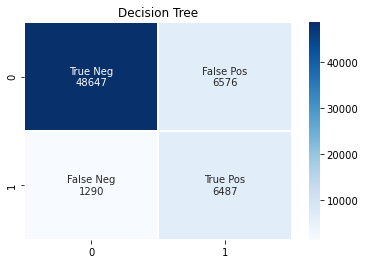

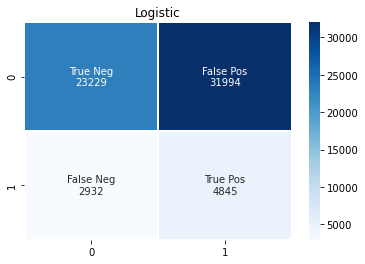

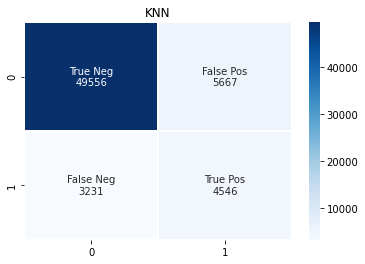

In [60]:
for i, j in zip(preds, models):
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    cnt = ['{0:0.0f}'.format(i) for i in
                confusion_matrix(y_test, i).flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(names, cnt)]

    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, i), annot=labels, fmt='', linewidths=.3, cmap="Blues").set(title=j)

In [61]:
y_prob_tree = tree.predict_proba(X_test)
y_prob_log = log.predict_proba(X_test)
y_prob_knn = knn.predict_proba(X_test)
y_probs = [y_prob_tree[:, 1], y_prob_log[:, 1], y_prob_knn[:, 1]]

Best Threshold=0.045455, G-Mean=0.858


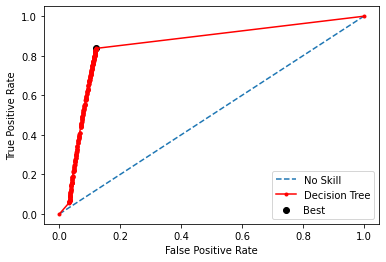

Best Threshold=0.505911, G-Mean=0.521


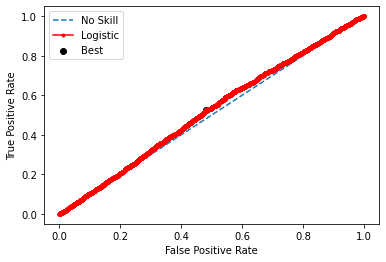

Best Threshold=0.200000, G-Mean=0.863


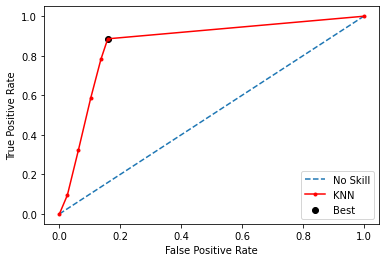

In [62]:
for i, j in zip(y_probs, models):
    fpr, tpr, thresholds = roc_curve(y_test, i)
    gmeans = np.sqrt(tpr.flatten() * (1 - fpr.flatten()))

    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=j, color='red')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [63]:
tree_pred = (y_probs[0] >= 0.045455).astype(bool)
log_pred = (y_probs[1] >= 0.505633).astype(bool)
knn_pred = (y_probs[2] >= 0.2).astype(bool)
probs = [tree_pred, log_pred, knn_pred]

In [64]:
for i, j in zip(probs, models):
    print('----------------------', j, '---------------------------')
    print(classification_report(y_test, i))

---------------------- Decision Tree ---------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     55223
           1       0.50      0.84      0.62      7777

    accuracy                           0.88     63000
   macro avg       0.74      0.86      0.77     63000
weighted avg       0.92      0.88      0.89     63000

---------------------- Logistic ---------------------------
              precision    recall  f1-score   support

           0       0.88      0.51      0.65     55223
           1       0.13      0.53      0.21      7777

    accuracy                           0.51     63000
   macro avg       0.51      0.52      0.43     63000
weighted avg       0.79      0.51      0.59     63000

---------------------- KNN ---------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     55223
           1       0.44      0.89      0.59      7777

  

# Using SMOTE

In [65]:
y_test.value_counts()

0    55223
1     7777
Name: risk_flag, dtype: int64

In [66]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train) # another resampling method

In [67]:
tree.fit(X_resampled, y_resampled)
log.fit(X_resampled, y_resampled)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [68]:
y_pred_tree = tree.predict(X_test)
y_pred_log = log.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [69]:
models = ['Decision Tree', 'Logistic', 'KNN']
preds = [y_pred_tree, y_pred_log, y_pred_knn]

In [70]:
for i, j in zip(preds, models):
    print('----------------------', j, '---------------------------')
    print(classification_report(y_test, i))

---------------------- Decision Tree ---------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     55223
           1       0.50      0.84      0.62      7777

    accuracy                           0.87     63000
   macro avg       0.74      0.86      0.77     63000
weighted avg       0.92      0.87      0.89     63000

---------------------- Logistic ---------------------------
              precision    recall  f1-score   support

           0       0.89      0.51      0.65     55223
           1       0.14      0.56      0.22      7777

    accuracy                           0.51     63000
   macro avg       0.51      0.53      0.43     63000
weighted avg       0.80      0.51      0.59     63000

---------------------- KNN ---------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     55223
           1       0.46      0.57      0.51      7777

  

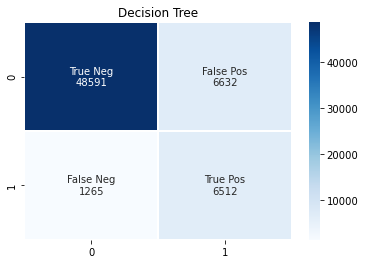

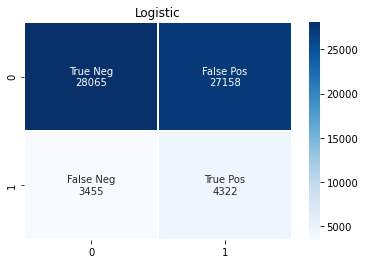

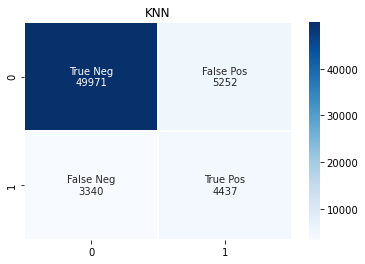

In [71]:
for i, j in zip(preds, models):
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    cnt = ['{0:0.0f}'.format(i) for i in
                confusion_matrix(y_test, i).flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(names, cnt)]

    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, i), annot=labels, fmt='', linewidths=.3, cmap="Blues").set(title=j)

In [72]:
y_prob_tree = tree.predict_proba(X_test)
y_prob_log = log.predict_proba(X_test)
y_prob_knn = knn.predict_proba(X_test)
y_probs = [y_prob_tree[:, 1], y_prob_log[:, 1], y_prob_knn[:, 1]]

Best Threshold=0.045455, G-Mean=0.860


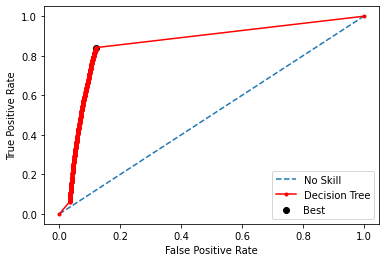

Best Threshold=0.504377, G-Mean=0.535


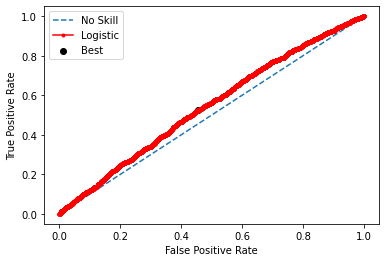

Best Threshold=0.200000, G-Mean=0.863


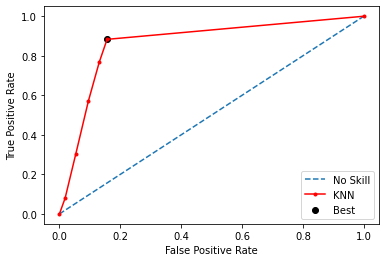

In [73]:
for i, j in zip(y_probs, models):
    fpr, tpr, thresholds = roc_curve(y_test, i)
    gmeans = np.sqrt(tpr.flatten() * (1 - fpr.flatten()))

    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=j, color='red')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [74]:
tree_pred = (y_probs[0] >= 0.045455).astype(bool)
log_pred = (y_probs[1] >= 0.503179).astype(bool)
knn_pred = (y_probs[2] >= 0.2).astype(bool)
probs = [tree_pred, log_pred, knn_pred]

In [75]:
for i, j in zip(probs, models):
    print('----------------------', j, '---------------------------')
    print(classification_report(y_test, i))

---------------------- Decision Tree ---------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     55223
           1       0.50      0.84      0.62      7777

    accuracy                           0.87     63000
   macro avg       0.74      0.86      0.77     63000
weighted avg       0.92      0.87      0.89     63000

---------------------- Logistic ---------------------------
              precision    recall  f1-score   support

           0       0.89      0.53      0.67     55223
           1       0.14      0.53      0.22      7777

    accuracy                           0.53     63000
   macro avg       0.51      0.53      0.44     63000
weighted avg       0.80      0.53      0.61     63000

---------------------- KNN ---------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     55223
           1       0.44      0.88      0.59      7777

  

# Conclusion

In this project we used **ADASYN** and **SMOTE** resampling methods and compared each other and with without using anything. As result we understand that is we would'n use anything our model will be just a trash. Results of ADASYN and SMOTE was not as good as i expected, their precision and recall for minority class was less than **60%** in general, only Decision Trees recall was nearly **85%**.
I think its because of negative correlation, none of features had positive correlation. So we can conclude that Decision tree is one of the best models, and I should stop using linear and logistic regressions